In [7]:
#2021/04/05 Tutorial on basic functions, first attempt of using VScode

%reset
%pylab

import os

%load_ext autoreload
%autoreload 2


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Overview

`PySurf` library consists in a set of classes and functions reapresenting 2D data and operations on them.



In [8]:
from pySurf.data2D_class import Data2D

In [9]:
%matplotlib inline

The main class representing 2D data with `x` and `y` axis is `Data2D` object in `pySurf.data2D_class`. `Data2D` can be initialized by providing a matrix of 2-dimensional data and (optionally) `x` and `y` coordinates. Other options can be passed as well.

The object interface is built on top of a function library in module `pySurf.data2D`: for almnost each method there is a corresponding function that can be called with something like `pySurf.data2D.function(data, x, y, ..)`.

Similarly, routines operating on profiles (y as a function of x as couples of vector x and y), are contained in class `pyProfile.Profile` and `pyProfile.profile` which have in many points interfaces similar to modules in `pySurf`. 

Here we will focus on `Data2D` object interface.

A first way to initialize such an object is by passing directly 2D data, (optionally) coordinates and options.



In [48]:
nx = 200
ny = 300
data = np.random.random(nx*ny).reshape(ny,nx)
x = np.arange(nx)*25
y = np.arange(ny)*10

D = Data2D(data,x,y,units=['mm','mm','um'])
#D.plot()

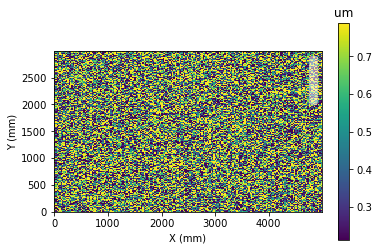

In [11]:
D.plot()

Data and coordinates can be obtained back in any moment simply calling the object:

In [51]:
dd, xx, yy = D()

In [52]:
len(xx)

200

In [54]:
dd, xx, yy = D()

print(dd.shape,xx.shape,yy.shape)
print("Equal?", np.all(dd == data), np.all(x == xx), np.all(y ==yy))

(300, 200) (200,) (300,)
Equal? True True True


Functions for reading common formats of 2D data are collected in `pySurf.readers` module. The structure and interface of readers is described elsewhere, a reader is essentially a function able to obtain `data, x, y` from a data file, however if the interface is correctly implemented, a reader from `pySurf.readers.instrumentReader` can be passed as argument to at object creation. In this case, additional information are automatically added to the object.

In [56]:
infolder=r'..\..\test\input_data\4D\180215_C1S06_cut'
fn = '180215_C1S01_RefSub.csv'
file = os.path.join(infolder,fn)

In [57]:
from pySurf.data2D_class import Data2D
from pySurf.instrumentReader import matrix4D_reader

D = Data2D(file, strip=True, reader = matrix4D_reader)

first argument is string, use it as filename


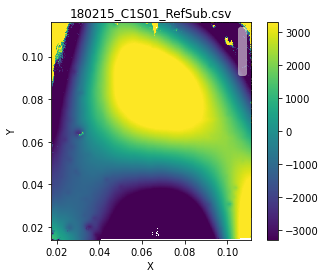

In [58]:
D.plot()

## Data manipulation functions

Basic operations like cropping or leveling can be applied by means of corresponding methods. Information about methods and options can be obtained by means of usual Python introspection methods.

Here some example:


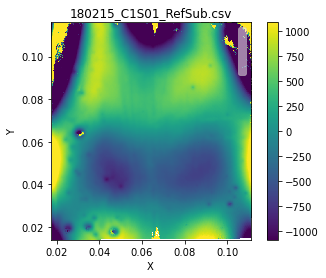

In [62]:
D2 = D.level((4,2))
D2.plot()  #Level 4 legendre along `x` and 2 along `y`.

`plotting` module contains commodity functions for plotting of data and comparisons, we use `plotting.multiplots.compare_images` to compare the original data with the modified version.

[<AxesSubplot:>, <AxesSubplot:>]

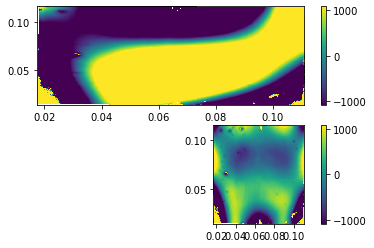

In [63]:
from pySurf.data2D import compare_2images

compare_2images(D.data,D2.data,D.x,D.y)




In [ ]:
D2 = D.level((4,2))

for d in compare_images(D,D2):
    d.plot()

In [ ]:
from pySurf.psd2d import calculatePSD
from pySurf.psd2d import psd2d, plot_psd2d,avgpsd2d
from pySurf.data2D import crop_data
